In [1]:
library( "DESeq2" )

Loading required package: S4Vectors
Loading required package: stats4
Loading required package: BiocGenerics
Loading required package: parallel

Attaching package: ‘BiocGenerics’

The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB

The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs

The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colMeans,
    colnames, colSums, dirname, do.call, duplicated, eval, evalq,
    Filter, Find, get, grep, grepl, intersect, is.unsorted, lapply,
    lengths, Map, mapply, match, mget, order, paste, pmax, pmax.int,
    pmin, pmin.int, Position, rank, rbind, Reduce, rowMeans, rownames,
    rowSums, sapply, setdiff, sort, table, tapply, union, unique,
    unsplit, which, which.max, which

In [2]:
df = read.csv('mirna.loc.bam.counts.csv')
head(df)

X,SRR1813261,SRR1813262,SRR1813263,SRR1813264,SRR1813265,SRR1813266,SRR1813267,SRR1813268,SRR1813269,⋯,SRR1813321,SRR1813322,SRR1813323,SRR1813324,SRR1813325,SRR1813326,SRR1813327,SRR1813328,SRR1813329,SRR1813330
<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
hsa-let-7a-1-hairpin,4362,7432,6888,9242,6061,9523,9093,9187,9861,⋯,6052,5929,11936,10169,21714,12320,20191,19382,11587,7839
hsa-let-7a-2-hairpin,4518,7692,6724,9488,6595,9753,10187,10038,10382,⋯,6699,5984,13037,11170,22230,12048,20562,19457,11321,7671
hsa-let-7a-3-hairpin,4427,7460,6612,9260,5972,9608,9255,9183,9748,⋯,6276,5895,11913,10194,21451,12236,20148,19707,11419,7638
hsa-let-7a-3p-mature,219,331,277,244,119,169,275,269,372,⋯,187,171,468,450,1923,1936,2459,3265,1117,838
hsa-let-7a-5p-mature,13069,22212,19912,27718,18493,28675,28206,28082,29585,⋯,18804,17602,36346,31019,63407,34621,58376,55197,33146,22264
hsa-let-7b-3p-mature,25,36,27,31,20,41,55,46,79,⋯,6,1,55,44,63,49,304,243,94,75


In [3]:
metadata = read.csv('metadata.csv')
print(metadata)

           id            treated    radiated
1  SRR1813330 previously_treated irradiation
2  SRR1813329 previously_treated        none
3  SRR1813328 previously_treated irradiation
4  SRR1813327 previously_treated        none
5  SRR1813326          untreated irradiation
6  SRR1813325          untreated        none
7  SRR1813324 previously_treated irradiation
8  SRR1813323 previously_treated        none
9  SRR1813322 previously_treated irradiation
10 SRR1813321 previously_treated        none
11 SRR1813320 previously_treated irradiation
12 SRR1813319 previously_treated        none
13 SRR1813318          untreated irradiation
14 SRR1813317          untreated        none
15 SRR1813316 previously_treated irradiation
16 SRR1813315 previously_treated        none
17 SRR1813314 previously_treated irradiation
18 SRR1813313 previously_treated        none
19 SRR1813312 previously_treated irradiation
20 SRR1813311 previously_treated        none
21 SRR1813310 previously_treated irradiation
22 SRR1813

In [4]:
dds <- DESeqDataSetFromMatrix(
    colData = metadata,
    countData = df,
    design = ~ treated + radiated,
    tidy = TRUE )
dds

class: DESeqDataSet 
dim: 3262 70 
metadata(1): version
assays(1): counts
rownames(3262): hsa-let-7a-1-hairpin hsa-let-7a-2-hairpin ...
  unaligned-hairpin unaligned-mature
rowData names(0):
colnames(70): SRR1813261 SRR1813262 ... SRR1813329 SRR1813330
colData names(3): id treated radiated

In [5]:
dds <- DESeq(dds)
dds

estimating size factors
estimating dispersions
gene-wise dispersion estimates
mean-dispersion relationship
final dispersion estimates
fitting model and testing
-- replacing outliers and refitting for 49 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)
estimating dispersions
fitting model and testing


class: DESeqDataSet 
dim: 3262 70 
metadata(1): version
assays(6): counts mu ... replaceCounts replaceCooks
rownames(3262): hsa-let-7a-1-hairpin hsa-let-7a-2-hairpin ...
  unaligned-hairpin unaligned-mature
rowData names(27): baseMean baseVar ... maxCooks replace
colnames(70): SRR1813261 SRR1813262 ... SRR1813329 SRR1813330
colData names(5): id treated radiated sizeFactor replaceable

In [6]:
res <- results(dds)
res

log2 fold change (MLE): radiated none vs irradiation 
Wald test p-value: radiated none vs irradiation 
DataFrame with 3262 rows and 6 columns
                              baseMean       log2FoldChange              lfcSE
                             <numeric>            <numeric>          <numeric>
hsa-let-7a-1-hairpin  10005.5152736639 0.000870747762408849 0.0880529099326572
hsa-let-7a-2-hairpin  10530.0430999603 -0.00786953986241392 0.0929687781701543
hsa-let-7a-3-hairpin  9983.02584280961  0.00679319625928434 0.0882083762388443
hsa-let-7a-3p-mature  430.863833894044   0.0504161790255587  0.150509407654408
hsa-let-7a-5p-mature  30029.1000790883  -0.0011201102348202  0.091802451458098
...                                ...                  ...                ...
hsa-mir-99b-3p-mature 8.64381809650383    0.251231113052159  0.389819449440108
hsa-mir-99b-5p-mature 194.698788696042    0.107051947610139  0.303016752848971
hsa-mir-99b-hairpin   203.485081422954    0.112973389361296   0.3043

In [7]:
summary(res)


out of 3262 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)       : 10, 0.31%
LFC < 0 (down)     : 2, 0.061%
outliers [1]       : 0, 0%
low counts [2]     : 1581, 48%
(mean count < 0)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



Warning message in int_abline(a = a, b = b, h = h, v = v, untf = untf, ...):
“semi-transparency is not supported on this device: reported only once per page”

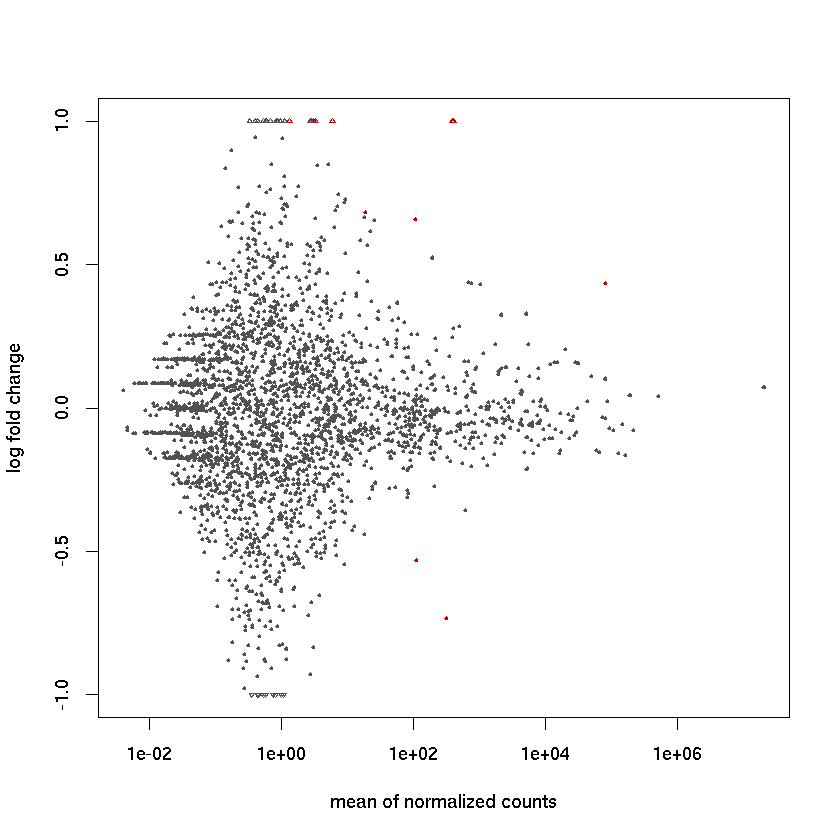

In [8]:
plotMA( res, ylim = c(-1, 1) )

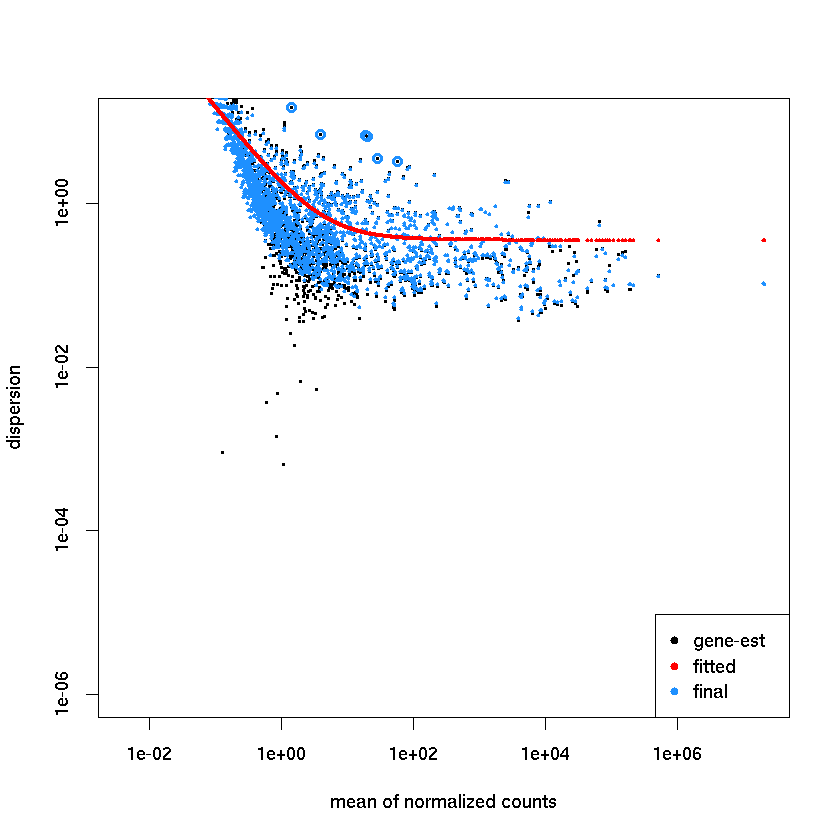

In [9]:
plotDispEsts( dds, ylim = c(1e-6, 1e1) )

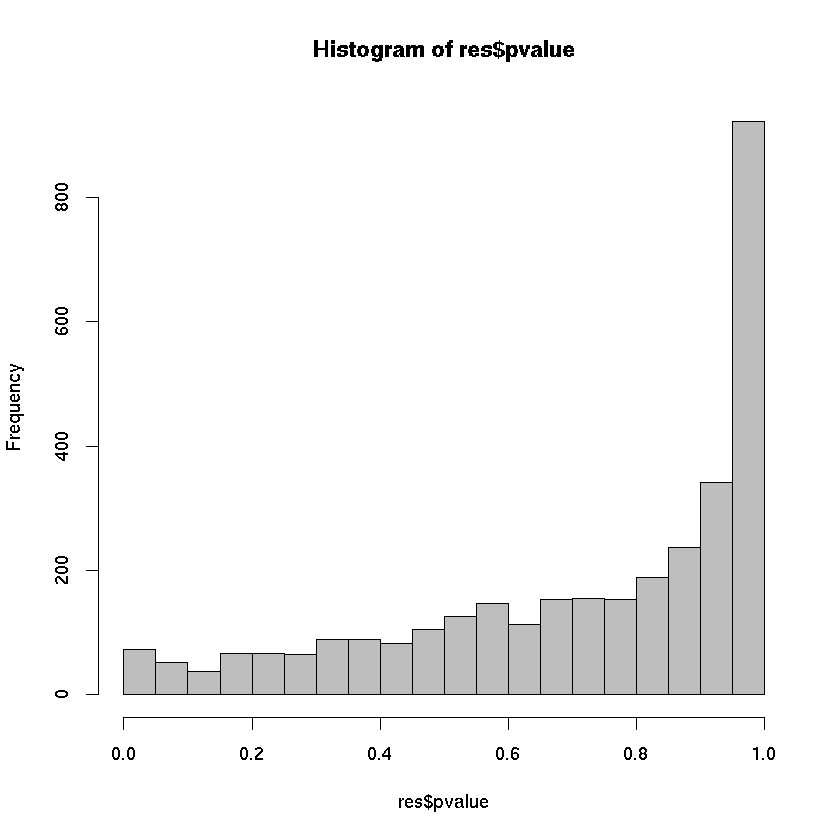

In [10]:
hist( res$pvalue, breaks=20, col="grey" )

In [11]:
res <- res[order(res$padj),]
head(res)

log2 fold change (MLE): radiated none vs irradiation 
Wald test p-value: radiated none vs irradiation 
DataFrame with 6 rows and 6 columns
                              baseMean     log2FoldChange             lfcSE
                             <numeric>          <numeric>         <numeric>
hsa-mir-34a-3p-mature 5.86721592198798    2.8346832450554 0.432883257985057
hsa-mir-34a-5p-mature 384.731470002752   2.01840087052323 0.318604133344115
hsa-mir-34a-hairpin   396.464118600162   2.03481993960271 0.319006379887747
hsa-mir-150-3p-mature 317.559463808566 -0.733360234736586 0.133009899812597
hsa-mir-1204-hairpin  1.30943390408208   2.92545047318797 0.552198713653362
hsa-mir-155-5p-mature 80590.2057314132   0.43289626012315 0.115805314533487
                                   stat               pvalue
                              <numeric>            <numeric>
hsa-mir-34a-3p-mature  6.54837809678761 5.81653070012343e-11
hsa-mir-34a-5p-mature  6.33513711620059 2.37130295220587e-10
hsa-mir-3

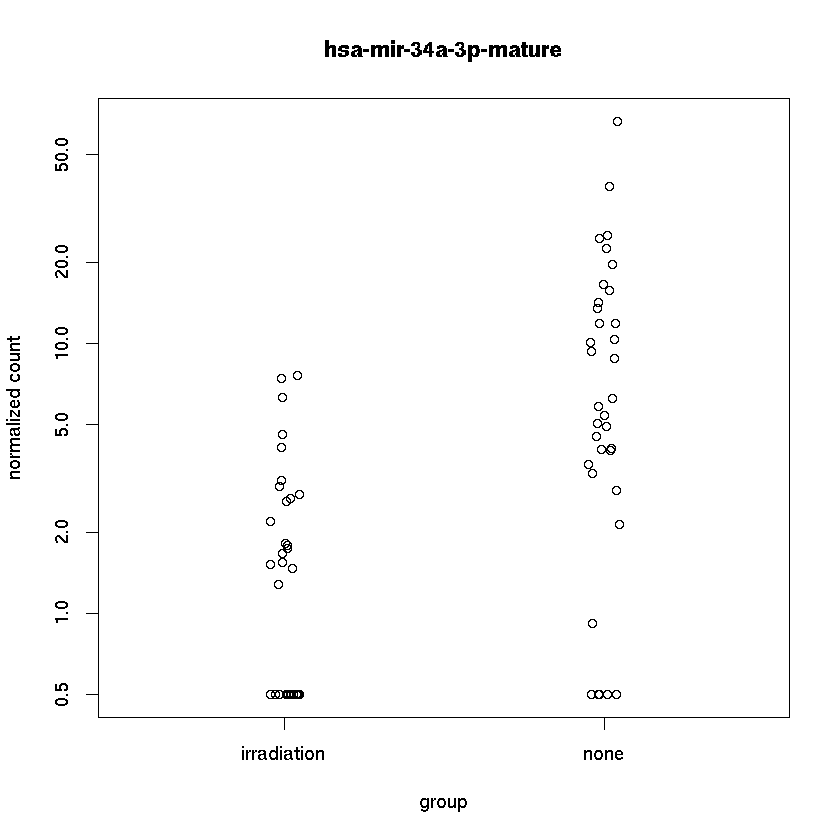

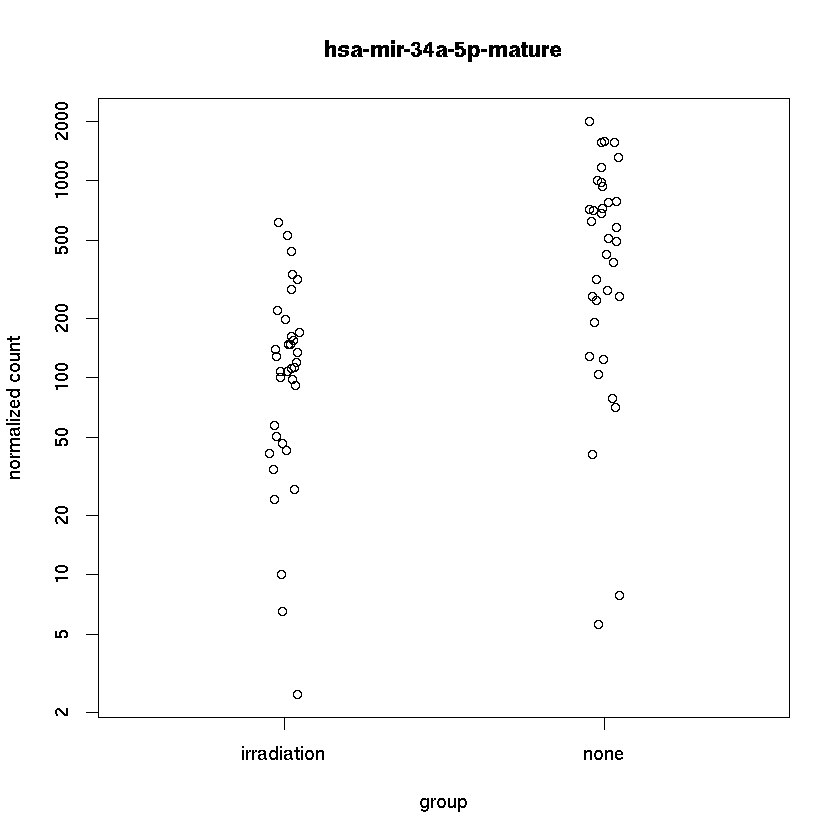

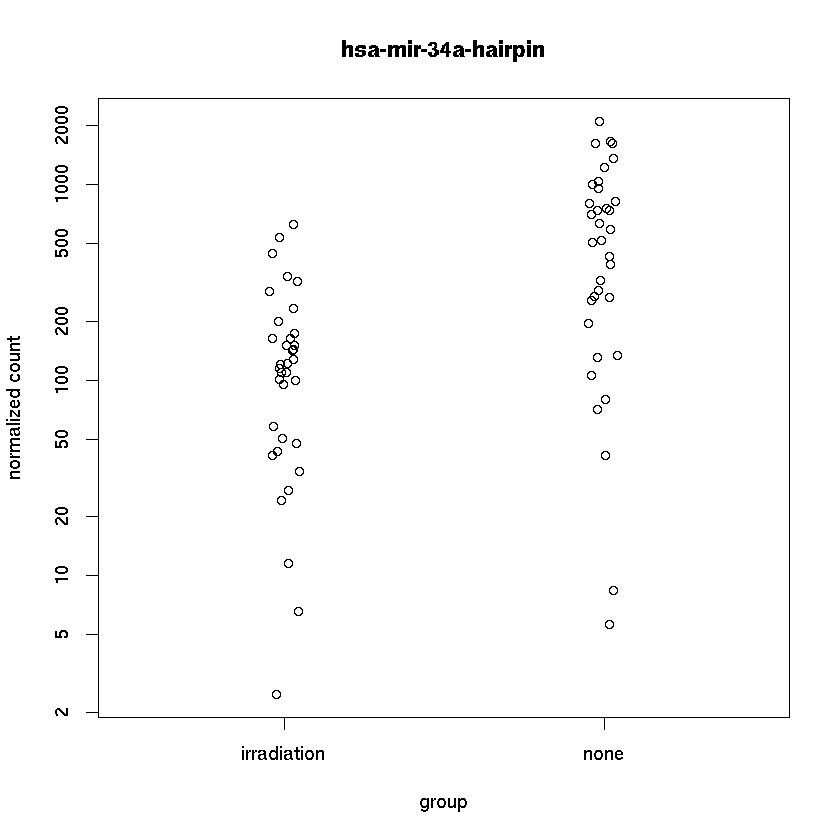

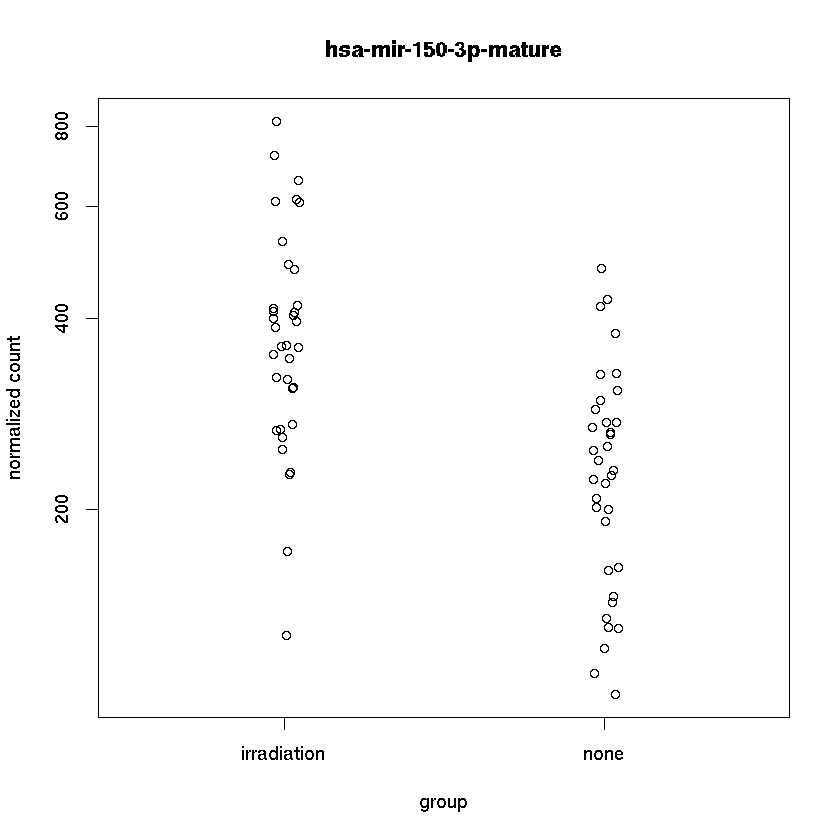

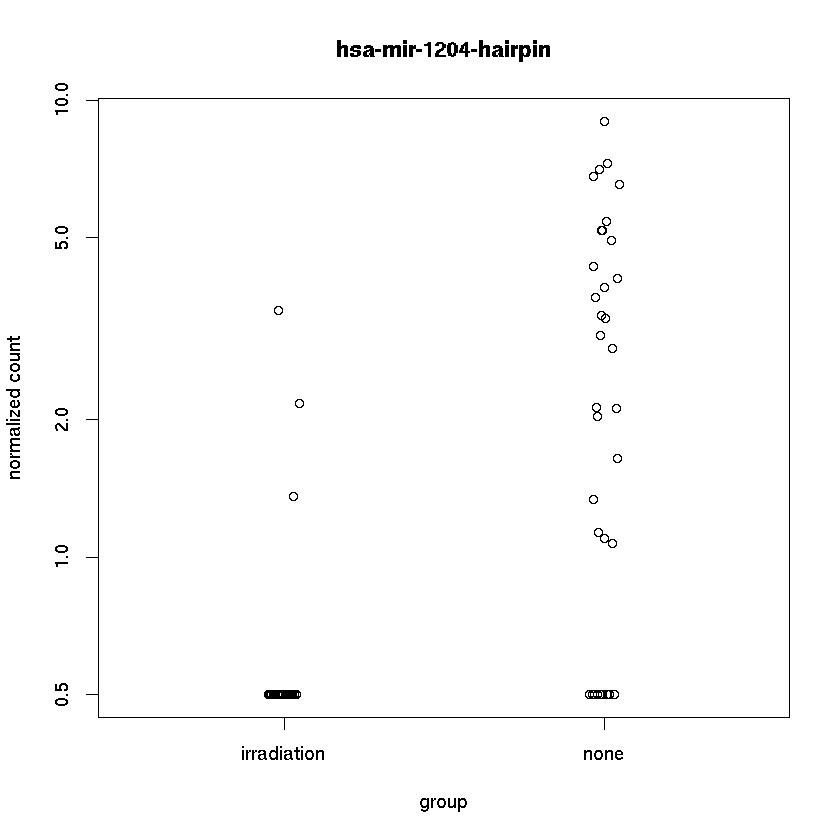

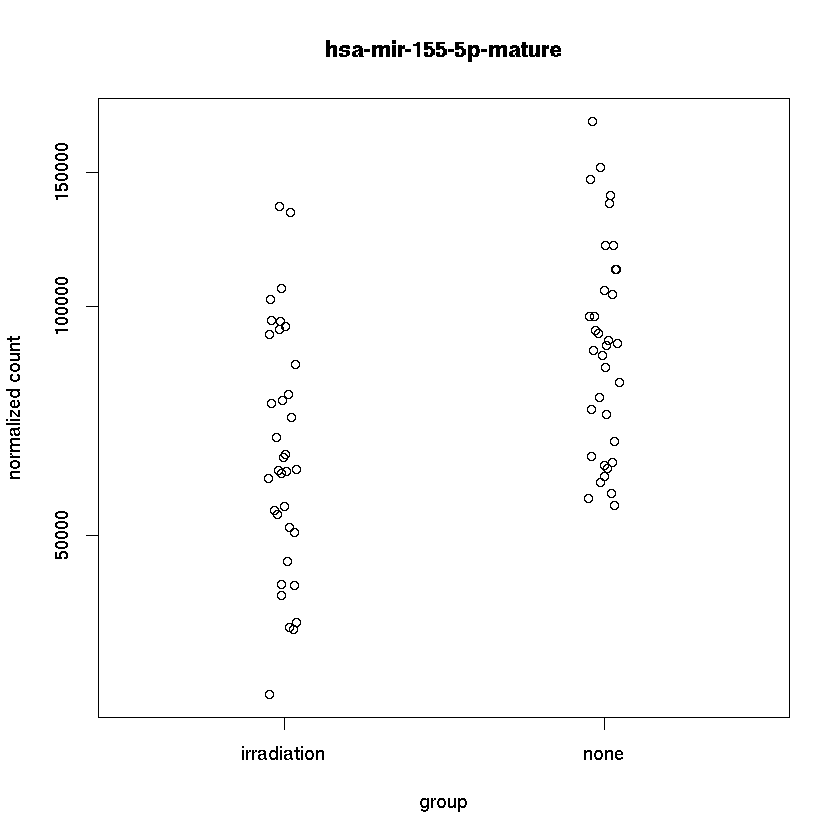

In [12]:
for( id in rownames(res[1:6,])){
    plotCounts(dds, gene=id, intgroup=c( 'radiated' ) )
}

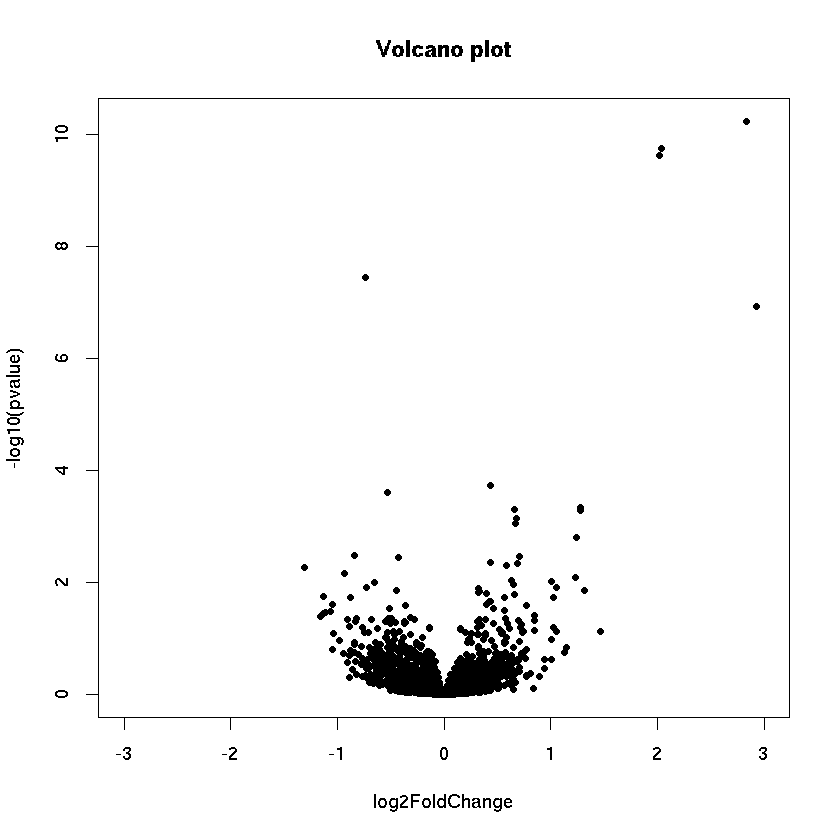

In [13]:
with(res, plot(log2FoldChange, -log10(pvalue), pch=20, main="Volcano plot", xlim=c(-3,3)))

In [14]:
#with(subset(res, padj<.01 ), points(log2FoldChange, -log10(pvalue), pch=20, col="blue"))

In [15]:
#with(subset(res, padj<.01 & abs(log2FoldChange)>2), points(log2FoldChange, -log10(pvalue), pch=20, col="red"))

In [16]:
#vsdata <- vst(dds, blind=FALSE)

In [17]:
#plotPCA(vsdata, intgroup="radiated")

In [18]:
## Apply regularized-log transform to counts
rld <- rlogTransformation(dds)

rlog() may take a long time with 50 or more samples,
vst() is a much faster transformation


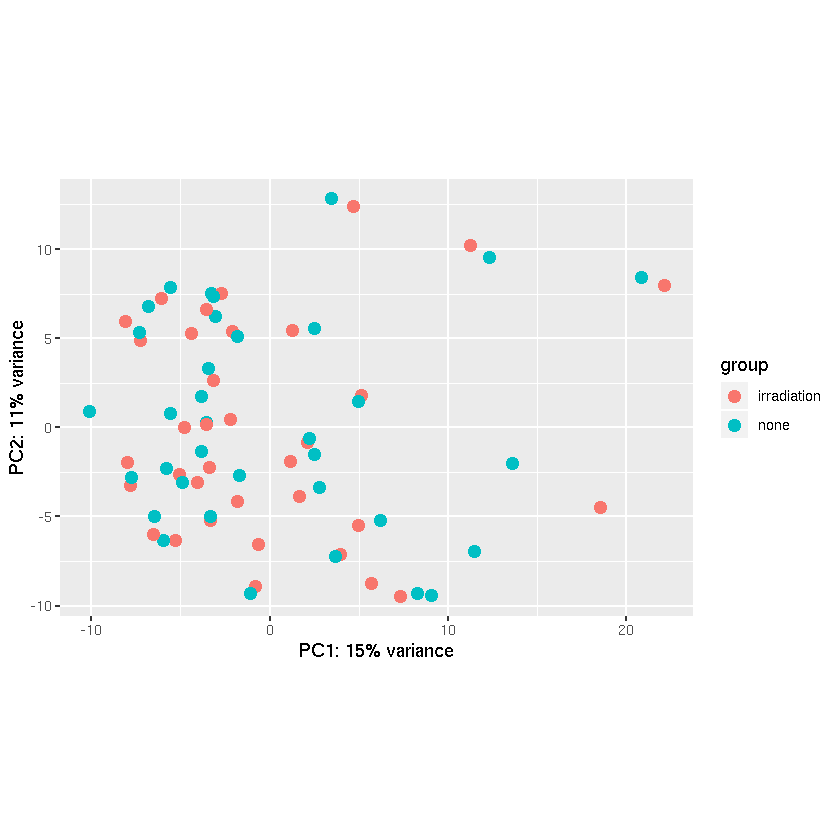

In [19]:
## Principal component analysis
plotPCA(rld, intgroup="radiated")


Attaching package: ‘gplots’

The following object is masked from ‘package:IRanges’:

    space

The following object is masked from ‘package:S4Vectors’:

    space

The following object is masked from ‘package:stats’:

    lowess



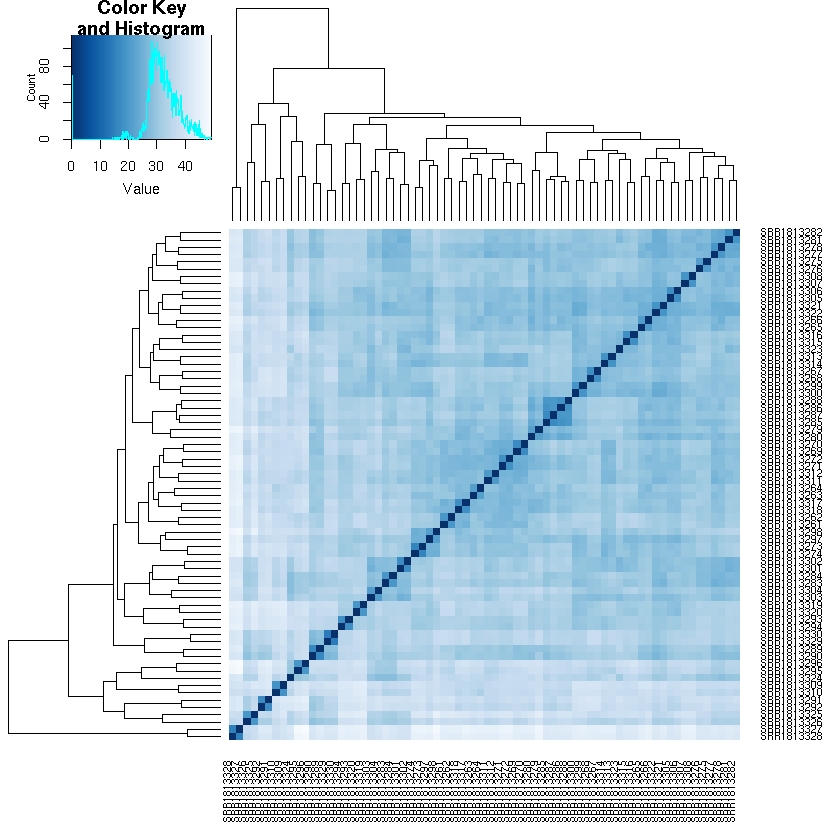

In [20]:
## Heatmap of sample distances
library("gplots")   # If this fails, run: install.packages("gplots")
library("RColorBrewer")
sampleDists <- dist(t(assay(rld)))
sampleDistMatrix <- as.matrix( sampleDists )
colours <- colorRampPalette(rev(brewer.pal(9, "Blues")))(255)
heatmap.2(sampleDistMatrix, trace="none", col=colours)


Attaching package: ‘genefilter’

The following objects are masked from ‘package:matrixStats’:

    rowSds, rowVars



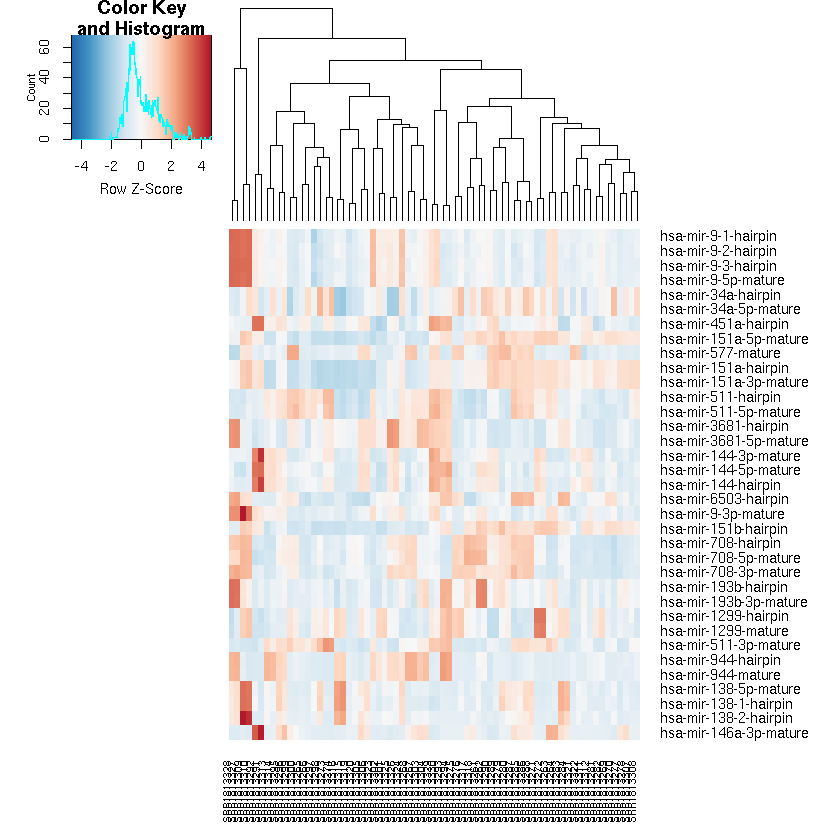

In [21]:
## Heatmap of 35 most variable genes
library("genefilter")
topVarGenes <- head(order(rowVars(assay(rld)), decreasing=TRUE), 35)
heatmap.2(assay(rld)[topVarGenes, ], scale="row",
trace="none", dendrogram="column", margins=c(5, 10),
col=colorRampPalette(rev(brewer.pal(9, "RdBu")))(255))